<a href="https://colab.research.google.com/github/ManvithaReddy1133/ecommerce-data-science/blob/main/Manvitha_Indukuri_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [7]:
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

In [8]:
customer_features = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'Category': 'nunique'
}).reset_index()

# Rename columns for clarity
customer_features.rename(columns={'Category': 'UniqueCategories'}, inplace=True)

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(customer_features.iloc[:, 1:])


In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler # Import StandardScaler

# Initialize the scaler
scaler = StandardScaler() # Create an instance of StandardScaler

# Normalize data, excluding the 'CustomerID' column
customer_features_scaled = scaler.fit_transform(customer_features[['TotalValue', 'Quantity', 'UniqueCategories']]) # Only include numerical features

# KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(customer_features_scaled)

# Evaluate clusters
db_index = davies_bouldin_score(customer_features_scaled, labels)

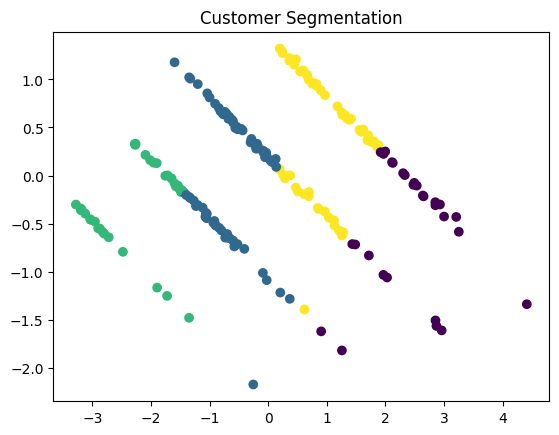

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_features = pca.fit_transform(customer_features_scaled)

# Plot clusters
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels, cmap='viridis')
plt.title('Customer Segmentation')
plt.show()
